**AIM :** Explore the descriptive and inferential statistics on the given dataset.

## **Step - 1 : Data Collection**

### **Rental Properties Collaboration Data**     [link to dataset](https://www.kaggle.com/datasets/arashnic/property-data?select=property.csv)

- **About Dataset:**
Traditionally finding the right home has been a long and tedious process. Online systems and e-real estate have made it easier by providing customer details and unique insights into homes. With the expansion of real estate systems, each company has its own website, leading to a potentially overwhelming search process for consumers. Building a Real Estate Recommender System has become desirable to assist users in filtering information based on their needs.

- **Features**
 -
item_id: A unique identifier for each property, facilitating tracking and referencing.
 -
deposit: The amount of money required upfront as a security deposit when renting the property.
 -
monthly_rent: The recurring monthly cost associated with renting the property.
 -
district_uuid: A unique identifier for the district where the property is located, providing geographical context.
 -
room_qty: The number of rooms in the property, giving an indication of its size and layout.
 -
unit_area: The total area of the rental unit, providing information on the space available.
 -
has_elevator: A binary indicator of whether the property has an elevator, impacting convenience and accessibility.
 -
building_floor_count: The total number of floors in the building where the property is situated.
 -
unit_floor: The floor on which the rental unit is located within the building.
 -
has_storage_area: A binary indicator of whether the property includes storage space, influencing its utility.


These features aim to provide comprehensive information for the development of a Real Estate Recommender System, offering users insights and facilitating a more efficient search process.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statistics
import seaborn as sns

In [2]:
df = pd.read_csv("property.csv")

In [11]:
# Check columns list and missing values
df.isnull().sum()

item_id                    0
deposit                    5
monthly_rent               0
district_uuid              1
room_qty                   3
unit_area                  0
has_elevator              17
building_floor_count    1648
unit_floor                37
has_storage_area          10
property_age               4
dtype: int64

In [12]:
# Get unique count for each variable
df.nunique()

item_id                 4930
deposit                  128
monthly_rent              98
district_uuid            160
room_qty                   6
unit_area                130
has_elevator               2
building_floor_count      15
unit_floor                18
has_storage_area           2
property_age              46
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4927 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


In [14]:
df

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0
...,...,...,...,...,...,...,...,...,...,...,...
4925,6b973986-d910-4d4b-91b0-5192328bb52b,2160000.0,720000,3ac48cb3-a697-4d94-a97c-3055f1ad4790,0.0,32,False,NaN,1.0,False,20.0
4926,fd8f40f5-bb1d-40f6-b8d5-9d2b4dbbef2b,129600000.0,1440000,16d5eea8-f513-4557-b96c-9d861fe4b1af,2.0,98,True,NaN,2.0,True,7.0
4927,02065751-328d-4f0e-bf50-b35e450b89dc,18000000.0,1296000,fd5ad07f-14b2-4491-aeb3-31651e92e1fd,1.0,63,False,NaN,1.0,True,9.0
4928,9c9800b4-280b-48fe-b86d-834509097f19,86400000.0,0,c2ab0a0e-c71b-4218-90db-16095a39983e,2.0,63,False,4.0,4.0,False,15.0


## **Step - 2 : Perform Descriptive Analysis**

In [4]:
df.shape

(4930, 11)

In [6]:
df.columns

Index(['item_id', 'deposit', 'monthly_rent', 'district_uuid', 'room_qty',
       'unit_area', 'has_elevator', 'building_floor_count', 'unit_floor',
       'has_storage_area', 'property_age'],
      dtype='object')

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
deposit,4925.0,8.321284e+07,5.289941e+07,0.0,43200000.0,72000000.0,108000000.0,432000000.0
monthly_rent,4930.0,1.052041e+06,3.797125e+06,0.0,0.0,720000.0,1440000.0,144000000.0
room_qty,4927.0,1.471890e+00,5.794310e-01,0.0,1.0,1.0,2.0,5.0
unit_area,4930.0,7.165335e+01,2.289089e+01,0.0,55.0,67.0,84.0,263.0
building_floor_count,3282.0,3.970750e+00,1.280667e+00,0.0,3.0,4.0,4.0,16.0
unit_floor,4893.0,2.417127e+00,3.496221e+00,-2.0,1.0,2.0,3.0,225.0
property_age,4926.0,1.365104e+01,8.483931e+00,0.0,8.0,14.0,18.0,99.0


### Central Tendancy - Mean, Median, Mode

In [17]:
# Numerical features
numerical_features = ['deposit', 'monthly_rent', 'room_qty', 'unit_area', 'building_floor_count', 'unit_floor','property_age']

#Calculate Mean,median,mode
mean_values = df[numerical_features].mean()
median_values = df[numerical_features].median()
mode_values = df[numerical_features].mode().iloc[0]
print("Mean")
print(mean_values)
print("")
print("Median")
print(median_values)
print("")
print("Mode")
print(mode_values)

Mean
deposit                 8.321284e+07
monthly_rent            1.052041e+06
room_qty                1.471890e+00
unit_area               7.165335e+01
building_floor_count    3.970750e+00
unit_floor              2.417127e+00
property_age            1.365104e+01
dtype: float64

Median
deposit                 72000000.0
monthly_rent              720000.0
room_qty                       1.0
unit_area                     67.0
building_floor_count           4.0
unit_floor                     2.0
property_age                  14.0
dtype: float64

Mode
deposit                 72000000.0
monthly_rent                   0.0
room_qty                       1.0
unit_area                     63.0
building_floor_count           4.0
unit_floor                     2.0
property_age                  15.0
Name: 0, dtype: float64


### Varaibility - Standard Deviation, Minimum value, MAximum value, Range, Kurtosis

In [18]:
#Calculate std deviation
df.std(axis=0,skipna = True)

<ipython-input-18-542d4da9acc7>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std(axis=0,skipna = True)


deposit                 5.289941e+07
monthly_rent            3.797125e+06
room_qty                5.794310e-01
unit_area               2.289089e+01
has_elevator            4.773656e-01
building_floor_count    1.280667e+00
unit_floor              3.496221e+00
has_storage_area        4.761138e-01
property_age            8.483931e+00
dtype: float64

In [22]:
#Calculate min
numerical_columns = ['deposit', 'monthly_rent', 'room_qty', 'unit_area', 'building_floor_count', 'unit_floor']

min_values = df[numerical_columns].min()

print(min_values)


deposit                 0.0
monthly_rent            0.0
room_qty                0.0
unit_area               0.0
building_floor_count    0.0
unit_floor             -2.0
dtype: float64


In [23]:
#Calculate max
numerical_columns = ['deposit', 'monthly_rent', 'room_qty', 'unit_area', 'building_floor_count', 'unit_floor']

max_values = df[numerical_columns].max()

print(max_values)


deposit                 432000000.0
monthly_rent            144000000.0
room_qty                        5.0
unit_area                     263.0
building_floor_count           16.0
unit_floor                    225.0
dtype: float64


In [24]:
#Calculatign range for deposit
range = df['deposit'].max() - df['deposit'].min()
range

432000000.0

In [28]:
#Calculate kurtosis
numerical_columns = ['deposit', 'monthly_rent', 'room_qty', 'unit_area', 'building_floor_count', 'unit_floor']
kurtosis_values = df[numerical_columns].kurtosis()
print(kurtosis_values)


deposit                    1.638738
monthly_rent             957.804599
room_qty                  -0.098608
unit_area                  3.242412
building_floor_count      15.721892
unit_floor              3359.326947
dtype: float64


#### 4. Skewness

In [26]:
#Calculate skewness
df.skew()

<ipython-input-26-33901756b40a>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


deposit                  1.106384
monthly_rent            28.675472
room_qty                 0.269292
unit_area                1.239355
has_elevator             0.624056
building_floor_count     2.263914
unit_floor              52.799706
has_storage_area        -0.642316
property_age             1.348331
dtype: float64

#### **Visualisation**

<ipython-input-73-6f7fa3f34556>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness_values.index, y=skewness_values.values, palette="viridis")


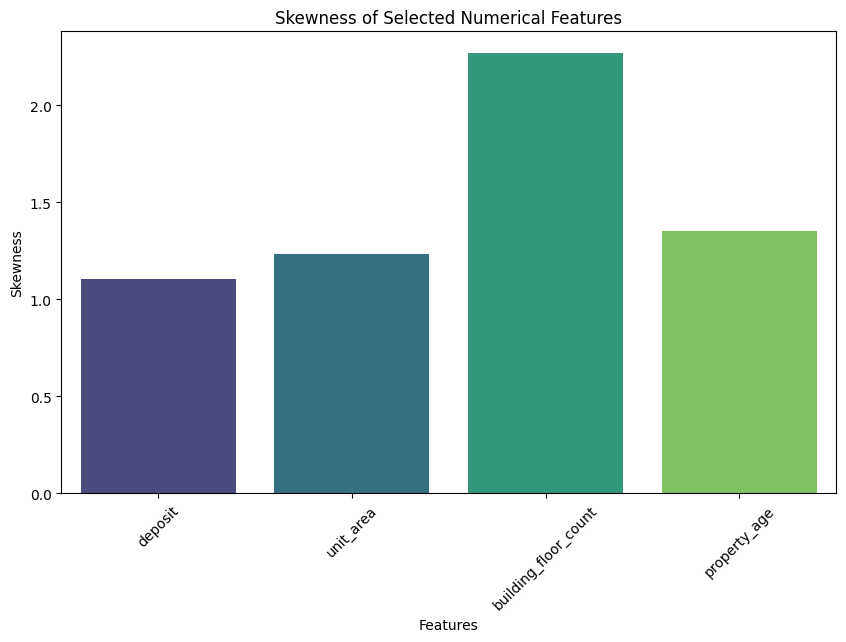

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
selected_numerical_columns = ['deposit', 'unit_area', 'building_floor_count', 'property_age']

# Calculate skewness for selected columns
skewness_values = df[selected_numerical_columns].skew()

#1. Create a bar chart to show skewness values
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness_values.index, y=skewness_values.values, palette="viridis")
plt.title("Skewness of Selected Numerical Features")
plt.xlabel("Features")
plt.ylabel("Skewness")
plt.xticks(rotation=45)
plt.show()



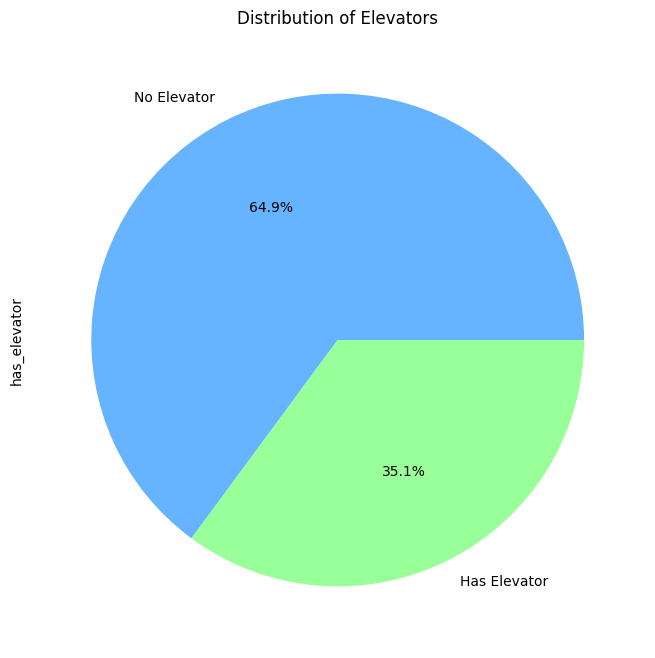

In [40]:
# 2. Pie chart of the distribution of 'has_elevator'
plt.figure(figsize=(8, 8))
df['has_elevator'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No Elevator', 'Has Elevator'], colors=['#66b3ff', '#99ff99'])
plt.title("Distribution of Elevators")
plt.show()

**Pie Chart - Elevator Distribution:**
The pie chart effectively communicates elevator distribution, highlighting a substantial prevalence among properties. This visualization offers a rapid understanding of the categorical distribution of elevators, with clear color-coding ('No Elevator' and 'Has Elevator') enhancing interpretability.

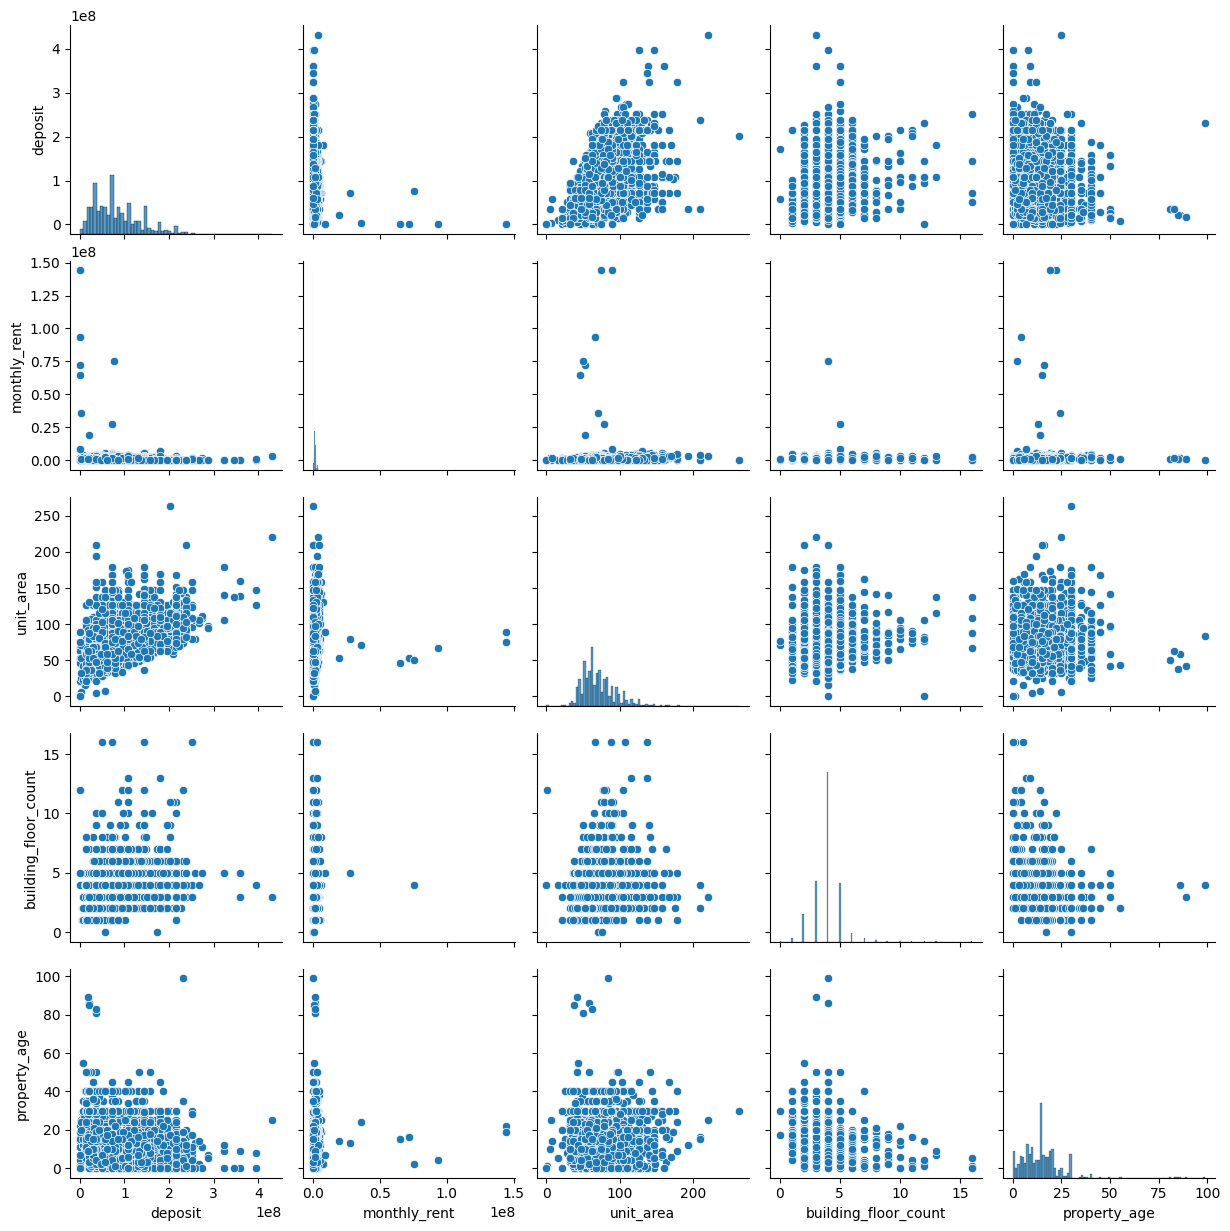

In [36]:
# 3. Pairplot of selected numerical columns
selected_columns = ['deposit', 'monthly_rent', 'unit_area', 'building_floor_count', 'property_age']
sns.pairplot(df[selected_columns])
plt.show()

**Pairplot - Numerical Relationships:**
The pair plot provides a detailed exploration of relationships among key numerical features, such as deposit, monthly rent, unit area, building floor count, and property age. Scatter plots reveal patterns and correlations between variables, while diagonal histograms offer insights into univariate distributions. This visualization is valuable for uncovering trends, identifying outliers, and understanding the overall structure of numerical features.

## **Step - 3: Perform Inferential Analysis**

**Linear Regression Model:**
The linear regression model predicts the 'monthly_rent' based on features such as 'deposit', 'unit_area', and 'room_qty' using a linear relationship between the features and the target variable. It minimizes the mean squared error to find the best-fitting line.

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score
from sklearn.preprocessing import KBinsDiscretizer

# Assuming 'df' is your DataFrame

# Drop rows with missing values in the dependent variable
df = df.dropna(subset=['monthly_rent'])

# Select a subset of features
selected_features = ['deposit', 'unit_area', 'room_qty']

# Define independent and dependent variables
X = df[selected_features]
y = df['monthly_rent']

# Convert 'monthly_rent' into categories (classification)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_class = est.fit_transform(y.values.reshape(-1, 1)).astype(int).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and Linear Regression Model
linear_model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression())])

# Fit the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(X_test)

# Convert predictions to categories
linear_predictions_class = est.transform(linear_predictions.reshape(-1, 1)).astype(int).flatten()

# Print results for Linear Regression
print("Linear Regression Results:")
print(f'Mean Squared Error: {mean_squared_error(y_test, linear_predictions)}')


Linear Regression Results:
Mean Squared Error: 0.15103201203804922


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


**Logistic Regression Model:**
The logistic regression model classifies 'monthly_rent' into categories (low, medium, high) using features like 'deposit', 'unit_area', and 'room_qty'. It models the probability of each class and assigns the category with the highest probability, aiming to find a decision boundary that best separates the classes.

In [69]:
from sklearn.metrics import classification_report

# Create a pipeline with an imputer and Logistic Regression Model
logistic_model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Fit the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Print results for Logistic Regression
print("\nLogistic Regression Results:")
print(f'Accuracy: {accuracy_score(y_test, logistic_predictions)}')
print(f'Precision (weighted): {precision_score(y_test, logistic_predictions, average="weighted")}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, logistic_predictions))


Logistic Regression Results:
Accuracy: 0.6237322515212982
Precision (weighted): 0.5153127164501048

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       616
           1       0.33      0.00      0.01       370

    accuracy                           0.62       986
   macro avg       0.48      0.50      0.39       986
weighted avg       0.52      0.62      0.48       986



**Hypothesis Testing:** The hypothesis test on the 'deposit' column assesses if there is a statistically significant difference in 'monthly_rent' between rental properties with high and low deposit amounts. The analysis uses a t-test to compare monthly rents above and below the median deposit. The aim is to determine if deposit amounts influence monthly rental rates, providing insights into their potential association in the dataset.

In [72]:
from scipy.stats import ttest_ind

# Drop rows with missing values in the dependent variable and 'deposit'
df = df.dropna(subset=['monthly_rent', 'deposit'])

# Perform t-test
high_deposit = df[df['deposit'] > df['deposit'].median()]['monthly_rent']
low_deposit = df[df['deposit'] <= df['deposit'].median()]['monthly_rent']

# Check if the datasets have enough samples
if len(high_deposit) > 1 and len(low_deposit) > 1:
    # Conduct t-test
    t_statistic, p_value = ttest_ind(high_deposit, low_deposit)

    # Print results
    print(f'T-statistic: {t_statistic}')
    print(f'P-value: {p_value}')

    # Check significance level (let's use 0.05)
    if p_value < 0.05:
        print("\nThere is a significant difference in monthly rent between properties with high and low deposit amounts.")
    else:
        print("\nThere is no significant difference in monthly rent between properties with high and low deposit amounts.")
else:
    print("\nInsufficient data for the t-test. Ensure both groups have more than one sample.")


T-statistic: -9.749004640185559
P-value: 2.962455211567619e-22

There is a significant difference in monthly rent between properties with high and low deposit amounts.
